In [59]:
import numpy as np
from logreg_skeleton import *

#### 3~4

In [84]:
X_train = np.loadtxt('X_train.txt',delimiter=',')
y_train = np.loadtxt('y_train.txt',delimiter=',')
y_train[y_train==0] = -1

X_val = np.loadtxt('X_val.txt',delimiter=',')
y_val = np.loadtxt('y_val.txt',delimiter=',')
y_val[y_val==0] = -1

In [85]:
n,p = X_train.shape
n,p

(1600, 20)

In [86]:
# standarize training data
def standarize(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    
    return (X - mean) / (std+1e-5)

In [87]:
X_train = standarize(X_train)
X_val = standarize(X_val)
# add bias column
X_train = np.hstack([X_train,np.ones((n,1))])
X_val = np.hstack([X_val,np.ones((X_val.shape[0],1))])

In [88]:
theta = np.zeros(21)
J = f_objective(theta, X_train, y_train, l2_param=1)
print(J)

0.6931471805599452


In [89]:
theta = fit_logistic_reg(X_train, y_train, l2_param=0)

In [90]:
theta

array([ 1.69606951e-02,  6.10721834e-03,  2.10951246e-01,  9.82047607e-01,
       -4.50418056e-02, -1.84776090e-02, -2.75889324e-02, -4.32537959e-02,
       -7.62465836e-02, -5.39185862e-01,  1.01241093e-01, -3.70179951e-03,
       -7.61421463e-02, -3.29975122e-03, -6.14198436e-03,  7.63521260e-04,
       -1.11776376e-02, -9.62856859e-02, -5.53444782e-02, -1.14165628e-01,
        1.22412410e-01])

In [91]:
import matplotlib.pyplot as plt

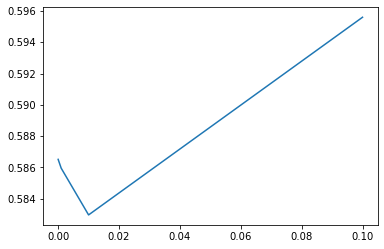

In [97]:
l2_list = [1e-5,1e-4,1e-3,1e-2,1e-1]
nll_list = []
for l2 in l2_list:
    theta = fit_logistic_reg(X_train, y_train, l2_param=l2)
    nll = f_objective(theta, X_val, y_val, val=True)
    nll_list.append(nll)
plt.plot(l2_list,nll_list)

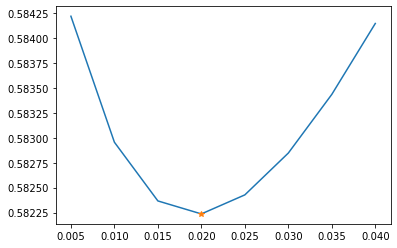

In [99]:
l2_list = np.arange(0.005,0.04,0.005)
nll_list = []
for l2 in l2_list:
    theta = fit_logistic_reg(X_train, y_train, l2_param=l2)
    nll = f_objective(theta, X_val, y_val, val=True)
    nll_list.append(nll)
plt.plot(l2_list,nll_list)
min_idx = np.argmin(nll_list)
plt.plot(l2_list[min_idx],nll_list[min_idx],marker='*')

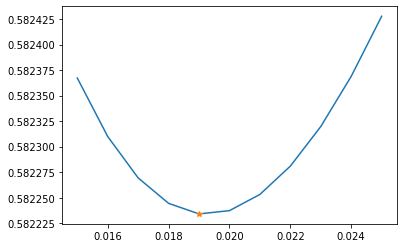

In [100]:
l2_list = np.arange(0.015,0.025,0.001)
nll_list = []
for l2 in l2_list:
    theta = fit_logistic_reg(X_train, y_train, l2_param=l2)
    nll = f_objective(theta, X_val, y_val, val=True)
    nll_list.append(nll)
plt.plot(l2_list,nll_list)
min_idx = np.argmin(nll_list)
plt.plot(l2_list[min_idx],nll_list[min_idx],marker='*')

#### 5

In [125]:
theta_best = fit_logistic_reg(X_train, y_train, l2_param=l2_list[min_idx])

In [126]:
probs = 1/(1+np.exp(-X_val@theta_best))

In [127]:
levels = np.arange(0,1.1,0.1)
prob_groups = []
y_groups = []
for i in range(len(levels)-1):
    idces = (probs > levels[i]) & (probs <= levels[i+1])
    prob_groups.append(probs[idces])
    y_groups.append(y_val[idces])

In [128]:
m = len(y_val)
ratio = []
for y_group in y_groups:
    ratio.append( (y_group == 1).sum() / len(y_group) )
    

In [129]:
ratio

[0.25,
 0.3333333333333333,
 0.234375,
 0.26666666666666666,
 0.34375,
 0.6136363636363636,
 0.8125,
 0.8809523809523809,
 0.7631578947368421,
 0.8636363636363636]

In [131]:
from sklearn.calibration import calibration_curve
y,x = calibration_curve(y_val,probs)

Text(0, 0.5, 'fraction of positives')

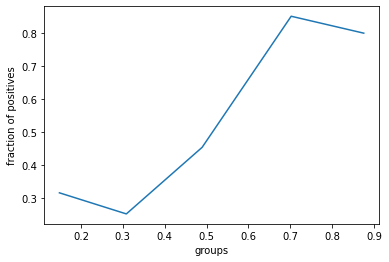

In [136]:
plt.plot(x,y)
plt.xlabel('groups')
plt.ylabel('fraction of positives')

Compared to the logistic regression curve here (https://scikit-learn.org/stable/modules/calibration.html), the above curve seems not calibrated as well. One potential reason may be the much smaller size of the training set.